In [1]:
# Memo 

In [1]:
quit()

In [1]:
import pykat
from pykat import finesse
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.patches as patches
#from prettytable import PrettyTable
import c_utils_DRFPMI as utl
import c_utils_DRFPMI_mifsim_gui as mif


%matplotlib inline
pykat.init_pykat_plotting(dpi=90)

                                              ..-
    PyKat 1.2.1           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



# Base Model
## Base model is only with amplitude detectors, no photo detectors

In [2]:
base_1 = utl.model_DRFPMI()
base_2 = mif.model_DRFPMI()

# Field Check (POP, TMSX)

## PRCL Sweep

<function matplotlib.pyplot.show(*args, **kw)>

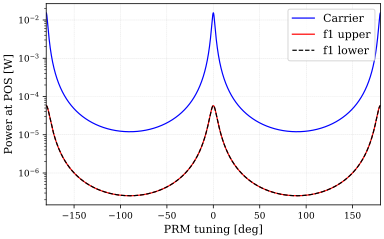

In [6]:
model, out_p = utl.run_sweep('PRCL', base_1)

plt.figure(1)
plt.semilogy(out_p.x, out_p["CR_POP"]**2,label="Carrier") # CR => 0
plt.semilogy(out_p.x, out_p["SB1p_POP"]**2,label="f1 upper")
plt.semilogy(out_p.x, out_p["SB1m_POP"]**2,label="f1 lower",LineStyle='--')
plt.xlabel("PRM tuning [deg]")
plt.ylabel("Power at POS [W]")
plt.legend(loc=1)
plt.show

## SRC tuning

<function matplotlib.pyplot.show(*args, **kw)>

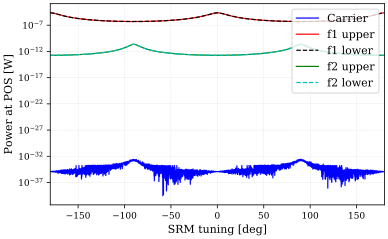

In [7]:
model, out = utl.run_sweep('SRCL', base_1)
model.SRM.phi = 0
out = model.run()

plt.figure(1)
plt.semilogy(out.x, out["CR_POS"]**2,label="Carrier") # CR => 0
plt.semilogy(out.x, out["SB1p_POS"]**2,label="f1 upper")
plt.semilogy(out.x, out["SB1m_POS"]**2,label="f1 lower",LineStyle='--')
plt.semilogy(out.x, out["SB2p_POS"]**2,label="f2 upper")
plt.semilogy(out.x, out["SB2m_POS"]**2,label="f2 lower",LineStyle='--')
plt.xlabel("SRM tuning [deg]")
plt.ylabel("Power at POS [W]")
plt.legend(loc=1)
plt.show

##### MICH Sweep

<function matplotlib.pyplot.show(*args, **kw)>

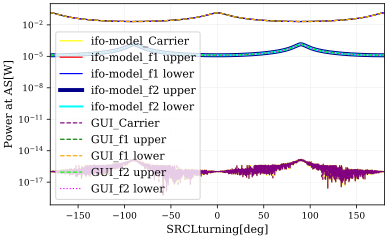

In [3]:
#cross check
DOF=('SRCL')
NOD=('AS')
model, out_p = utl.run_sweep(DOF, base_1)
model, out_m = mif.run_sweep(DOF, base_2)


CR=('CR_'+NOD)
SB1p=('SB1p_'+NOD)
SB1m=('SB1m_'+NOD)
SB2p=('SB2p_'+NOD)
SB2m=('SB2m_'+NOD)
car_ad=('car_ad_'+NOD)
fsb1_upper=('fsb1_upper_ad_'+NOD)
fsb2_upper=('fsb2_upper_ad_'+NOD)
fsb1_lower=('fsb1_lower_ad_'+NOD)
fsb2_lower=('fsb2_lower_ad_'+NOD)
plt.figure(1)
plt.semilogy(out_p.x, out_p[CR],label="ifo-model_Carrier",color="yellow") # CR => 0
plt.semilogy(out_p.x, out_p[SB1p],label="ifo-model_f1 upper",color="red")
plt.semilogy(out_p.x, out_p[SB1m],label="ifo-model_f1 lower",color="blue")
plt.semilogy(out_p.x, out_p[SB2p],label="ifo-model_f2 upper",color="darkblue",linewidth="4")
plt.semilogy(out_p.x, out_p[SB2m],label="ifo-model_f2 lower",color="aqua",linewidth="2")

plt.semilogy(out_m.x, out_m[car_ad],label="GUI_Carrier",LineStyle='--',color="purple") # CR => 0
plt.semilogy(out_m.x, out_m[fsb1_upper],label="GUI_f1 upper",LineStyle='--',color="green")
plt.semilogy(out_m.x, out_m[fsb1_lower],label="GUI_f1 lower",LineStyle='--',color="orange")
plt.semilogy(out_m.x, out_m[fsb2_upper],label="GUI_f2 upper",LineStyle='--',color="lime")
plt.semilogy(out_m.x, out_m[fsb2_lower],label="GUI_f2 lower",LineStyle=':',color="magenta")

ylabel=("Power at "+NOD+"[W]")
xlabel=(DOF+'turning[deg]')                      
plt.xlabel(xlabel)
plt.ylabel(ylabel)
#plt.ylim(1e-4,1e1)
plt.legend(loc=3)
plt.show

## Sweep one End mirror

<function matplotlib.pyplot.show(*args, **kw)>

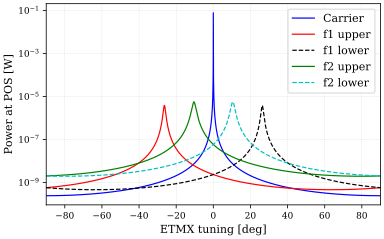

In [7]:
model = base.deepcopy()
model.parse("""
xaxis ETMX phi lin -90 90 5000
yaxis lin abs""")

out = model.run()

plt.figure(1)
plt.semilogy(out.x, out["CR_TMSX"]**2,label="Carrier") # CR => 0
plt.semilogy(out.x, out["SB1p_TMSX"]**2,label="f1 upper")
plt.semilogy(out.x, out["SB1m_TMSX"]**2,label="f1 lower",LineStyle='--')
plt.semilogy(out.x, out["SB2p_TMSX"]**2,label="f2 upper")
plt.semilogy(out.x, out["SB2m_TMSX"]**2,label="f2 lower",LineStyle='--')

plt.xlabel("ETMX tuning [deg]")
plt.ylabel("Power at POS [W]")
#plt.ylim(1e-14,1e-3)
plt.legend(loc=1)
plt.show


## Frequency Responses

### CARM
CARM has a pole.

<function matplotlib.pyplot.show(*args, **kw)>

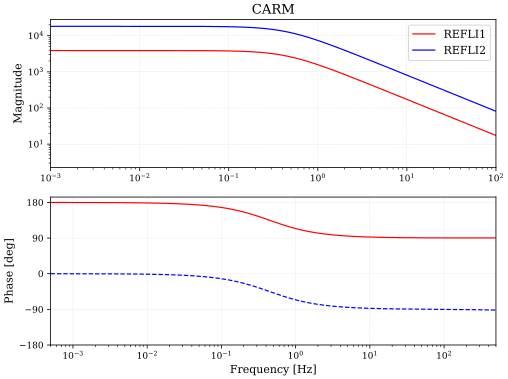

In [8]:
model,out = utl.run_fsig('CARM',base)
fig = plt.figure(figsize=(8, 6))

plt.subplot(2,1,1)
plt.loglog(out.x, np.abs(out["REFLI1"]),label="REFLI1",c='red')
plt.loglog(out.x, np.abs(out["REFLI2"]),label="REFLI2",c='blue')
#plt.loglog(out.x, np.abs(out["REFLQ1"]),label="REFLQ1",c='red',Linestyle='--')
#plt.loglog(out.x, np.abs(out["REFLQ2"]),label="REFLQ2",c='blue',Linestyle='--')
plt.xlim(0.001,100)
#plt.ylim(10,3e+4)
plt.title('CARM')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(out.x, np.angle(out["REFLI1"])*180/np.pi,label="REFLI1",c='red')
plt.semilogx(out.x, np.angle(out["REFLI2"])*180/np.pi,label="REFLI2",c='blue',Linestyle='--')
#plt.semilogx(out.x, np.angle(out["REFLQ1"])*180/np.pi,label="REFLI1",c='red',Linestyle='--')
#plt.semilogx(out.x, np.angle(out["REFLQ2"])*180/np.pi,label="REFLI2",c='blue',Linestyle='--')
#plt.ylim(-200,200)
plt.yticks([-180,-90,0,90,180])
plt.ylabel('Phase [deg]')
plt.xlabel('Frequency [Hz]')


plt.savefig('./figures/CARM.png')

plt.show

In [7]:
### Searching pole...

print('Gain at DC is')
print(np.abs(out["REFLI1"][0]))
print('Gain at pole should be')
print(np.abs(out["REFLI1"][0])/np.sqrt(2))

print(np.abs(out["REFLI1"][264]))
print('Pole is at')
print(out.x[264])

Gain at DC is
3892.77149555314
Gain at pole should be
2752.6051221153234
2778.4741019583
Pole is at
0.436515832240166


### DARM

<function matplotlib.pyplot.show(*args, **kw)>

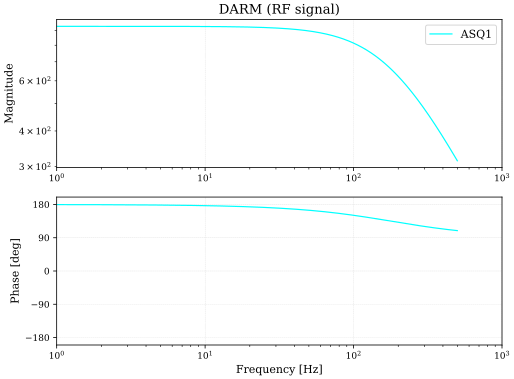

In [9]:
base = utl.model_DRFPMI()
model, out_darm = utl.run_fsig('DARM', base)
fig = plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
#plt.loglog(out_darm.x, np.abs(out_darm["ASQ2"]),label="ASQ2",c='green')
#plt.loglog(out_darm.x, np.abs(out_darm["ASI2"]),label="ASI2",c='red')
plt.loglog(out_darm.x, np.abs(out_darm["ASQ1"]),label="ASQ1",c='cyan')
#plt.loglog(out_darm.x, np.abs(out_darm["ASI2"]),label="ASI1",c='orange')
plt.xlim(1,1000)
#plt.ylim(10,3e+4)
#plt.ylim(1e-2, 1)
plt.title('DARM (RF signal)')
plt.ylabel('Magnitude')

plt.legend()

plt.subplot(2,1,2)
plt.semilogx(out_darm.x, np.angle(out_darm["ASQ1"])*180/np.pi,label="ASQ1",c='cyan')
plt.xlim(1,1000)
plt.ylim(-200,200)
plt.yticks([-180,-90,0,90,180])
plt.ylabel('Phase [deg]')
plt.xlabel('Frequency [Hz]')

plt.savefig('./figures/DARM.png')

plt.show

In [69]:
### Searching pole...

print('Gain at DC is')
print(np.abs(out_darm["ASQ2"][0]))
print('Gain at pole should be')
print(np.abs(out_darm["ASQ2"][0])/np.sqrt(2))

print(np.abs(out_darm["ASQ2"][651]))
print('Pole is at')
print(out_darm.x[651])

Gain at DC is
0.082916066053766
Gain at pole should be
0.05863051257592963
0.0584946602511422
Pole is at
179.887091512879


### PRCL

PRCL has a set of zero-pole. The pole frequency should be compared with the analytical prediction. 

In [10]:
# Deriving demod phase for PRCL
base = utl.model_DRFPMI()
###### Run ######
model,out_prcl = utl.run_fsig("PRCL", base)
################

dummy, demod_REFL1 = utl.demod_phase(out,"REFL","1",0)
dummy, demod_REFL2 = utl.demod_phase(out,'REFL','2',0)
dummy, demod_POP1 = utl.demod_phase(out,'POP','1',0)
dummy, demod_POP2 = utl.demod_phase(out,'POP','2',0)

print(demod_REFL1)
print(demod_REFL2)
print(demod_POP1)
print(demod_POP2)

0.3759941262132053
-0.3119164191370789
-60.87198837879111
77.79658073548066


<function matplotlib.pyplot.show(*args, **kw)>

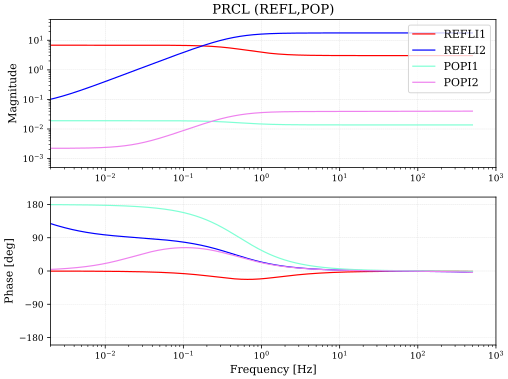

In [11]:
fig = plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.loglog(out_prcl.x, np.abs(out_prcl["REFLI1"]),label="REFLI1",c='red')
plt.loglog(out_prcl.x, np.abs(out_prcl["REFLI2"]),label="REFLI2",c='blue')
plt.loglog(out_prcl.x, np.abs(out_prcl["POPI1"]),label="POPI1",c='aquamarine')
plt.loglog(out_prcl.x, np.abs(out_prcl["POPI2"]),label="POPI2",c='violet')
plt.legend()

plt.xlim(0.002,1000)
plt.ylim(5e-4,5e+1)
plt.title('PRCL (REFL,POP)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(out_prcl.x, np.angle(out_prcl["REFLI1"])*180/np.pi,label="REFLI1",c='red')
plt.semilogx(out_prcl.x, np.angle(out_prcl["REFLI2"])*180/np.pi,label="REFLI2",c='blue')
plt.semilogx(out_prcl.x, np.angle(out_prcl["POPI1"])*180/np.pi,label="POPI2",c='aquamarine')
plt.semilogx(out_prcl.x, np.angle(out_prcl["POPI2"])*180/np.pi,label="POPI2",c='violet')
plt.xlim(0.002,1000)
plt.ylim(-200,200)
plt.yticks([-180,-90,0,90,180])
plt.ylabel('Phase [deg]')
plt.xlabel('Frequency [Hz]')

plt.savefig('./figures/PRCL.png')

plt.show

In [28]:
### Searching pole...

print('Gain at DC is')
print(np.abs(out_prcl["REFLI1"][0]))
print('Gain at pole should be')
print(np.abs(out_prcl["REFLI1"][0])/np.sqrt(2))

print(np.abs(out_prcl["REFLI1"][510]))
print('Pole is at')
print(out_prcl.x[510])

Gain at DC is
6.82067100871652
Gain at pole should be
4.822942722505941
4.81576865638693
Pole is at
0.574076810748441


### SRCL

SRCL seems to be flat. 

<function matplotlib.pyplot.show(*args, **kw)>

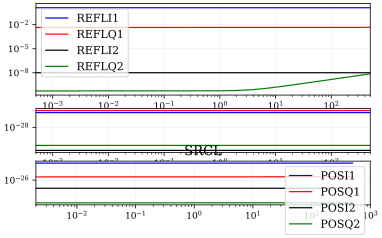

In [12]:
## -------------------------------------------------------------
# Checking how SRCL signals are like
## -------------------------------------------------------------

model,out_srcl = utl.run_fsig("SRCL", base)

plt.subplot(2,1,1)
plt.loglog(out_srcl.x, np.abs(out_srcl["REFLI1"]),label="REFLI1")
plt.loglog(out_srcl.x, np.abs(out_srcl["REFLQ1"]),label="REFLQ1")
plt.loglog(out_srcl.x, np.abs(out_srcl["REFLI2"]),label="REFLI2")
plt.loglog(out_srcl.x, np.abs(out_srcl["REFLQ2"]),label="REFLQ2")
plt.legend()

## No signals at REFL I2/Q2 -----------------------------------
plt.subplot(2,1,2)
plt.loglog(out_srcl.x, np.abs(out_srcl["POPI1"]),label="POPI1")
plt.loglog(out_srcl.x, np.abs(out_srcl["POPQ1"]),label="POPQ1")
plt.loglog(out_srcl.x, np.abs(out_srcl["POPI2"]),label="POPI2")
plt.loglog(out_srcl.x, np.abs(out_srcl["POPQ2"]),label="POPQ2")
plt.legend()

## No signals at POS or AS ------------------------------------
plt.subplot(4,1,3)
plt.loglog(out_srcl.x, np.abs(out_srcl["POSI1"]),label="POSI1")
plt.loglog(out_srcl.x, np.abs(out_srcl["POSQ1"]),label="POSQ1")
plt.loglog(out_srcl.x, np.abs(out_srcl["POSI2"]),label="POSI2")
plt.loglog(out_srcl.x, np.abs(out_srcl["POSQ2"]),label="POSQ2")

plt.subplot(4,1,4)
plt.loglog(out_srcl.x, np.abs(out_srcl["ASI1"]),label="POSI1")
plt.loglog(out_srcl.x, np.abs(out_srcl["ASQ1"]),label="POSQ1")
plt.loglog(out_srcl.x, np.abs(out_srcl["ASI2"]),label="POSI2")
plt.loglog(out_srcl.x, np.abs(out_srcl["ASQ2"]),label="POSQ2")
## -------------------------------------------------------------

plt.xlim(0.002,1000)
plt.title('SRCL')
plt.legend()

'''
plt.subplot(2,1,2)
plt.semilogx(out_srcl.x, np.angle(out_srcl["POSQ1"])*180/np.pi,label="POSQ1")
plt.semilogx(out_srcl.x, np.angle(out_srcl["ASQ1"])*180/np.pi,label="ASQ1")

plt.xlim(0.002,1000)
plt.ylim(-180,180)

'''
plt.show

No SRCL signal at REFL f2, POS (all) or AS (all) -- ?

In [13]:
# Deriving demod phase for SRCL
###### Run ######
model,out = utl.run_fsig("SRCL", base)
################

dummy, demod_REFL1 = utl.demod_phase(out,"REFL","1",0)
dummy, demod_POP1 = utl.demod_phase(out,'POP','1',0)

print(demod_REFL1)
print(demod_POP1)

-0.1986029063773697
-60.964933258824125


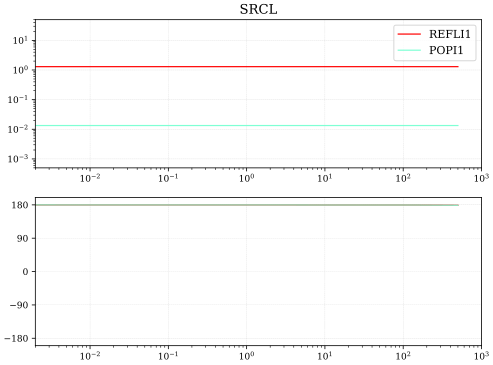

In [14]:
## -------------------------------------------------------------
# This is a basic sequence to change demodulation phase
## -------------------------------------------------------------

base = utl.model_DRFPMI()
model, dummy = utl.run_fsig("SRCL", base)
model.REFLI1.phase1 = -0.47
model.POPI1.phase1 = -61.2

out_srcl = model.run()

fig = plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.loglog(out_srcl.x, np.abs(out_srcl["REFLI1"]),label="REFLI1",c='red')
#plt.loglog(out_srcl.x, np.abs(out_srcl["REFLQ1"]),label="REFLQ1",Linestyle='--')
plt.loglog(out_srcl.x, np.abs(out_srcl["POPI1"]),label="POPI1",c='aquamarine')
#plt.loglog(out_srcl.x, np.abs(out_srcl["POPQ1"]),label="POPQ1",Linestyle='--')
plt.legend()

plt.xlim(0.002,1000)
plt.ylim(5e-4,5e+1)
plt.title('SRCL')
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(out_srcl.x, np.angle(out_srcl["REFLI1"])*180/np.pi,label="REFLI1",c='red')
plt.semilogx(out_srcl.x, np.angle(out_srcl["POPI1"])*180/np.pi,label="POPI1",c='aquamarine')
plt.xlim(0.002,1000)
plt.ylim(-200,200)
plt.yticks([-180,-90,0,90,180])

plt.savefig('./figures/SRCL.png')

plt.show

# Clear
del dummy, base

### MICH

MICH must be flat. 

In [16]:
# Deriving demod phase for SRCL
###### Run ######
base = utl.model_DRFPMI()
model,out = utl.run_fsig("MICH", base)
################

dummy, demod_REFL1 = utl.demod_phase(out,"REFL","1",0)
dummy, demod_REFL2 = utl.demod_phase(out,"REFL","2",0)

dummy, demod_POP1 = utl.demod_phase(out,'POP','1',0)
dummy, demod_POP2 = utl.demod_phase(out,'POP','2',0)

dummy, demod_POS1 = utl.demod_phase(out,'POS','1',0)

dummy, demod_AS1 = utl.demod_phase(out,'AS','1',0)


print(demod_REFL1)
print(demod_REFL2)
print(demod_POP1)
print(demod_POP2)
print(demod_POS1)
print(demod_AS1)

2.085247566942047
-1.4542209574319223
-58.779822156013644
74.3624564508432
-28.921465258254976
89.90069854681309


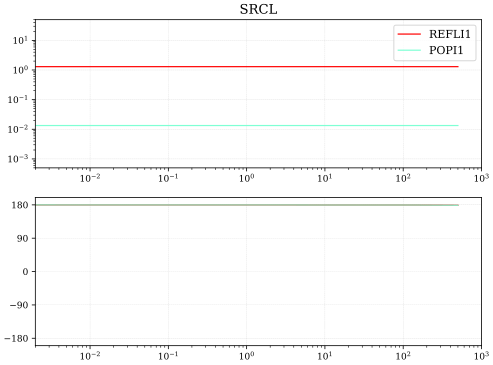

In [18]:
## -------------------------------------------------------------
# This is a basic sequence to change demodulation phase
## -------------------------------------------------------------

base = utl.model_DRFPMI()
model, dummy = utl.run_fsig("SRCL", base)
model.REFLI1.phase1 = -0.47
model.REFLI1.phase1 = -0.47
model.POPI1.phase1 = -61.2

out_srcl = model.run()

fig = plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.loglog(out_srcl.x, np.abs(out_srcl["REFLI1"]),label="REFLI1",c='red')
#plt.loglog(out_srcl.x, np.abs(out_srcl["REFLQ1"]),label="REFLQ1",Linestyle='--')
plt.loglog(out_srcl.x, np.abs(out_srcl["POPI1"]),label="POPI1",c='aquamarine')
#plt.loglog(out_srcl.x, np.abs(out_srcl["POPQ1"]),label="POPQ1",Linestyle='--')
plt.legend()

plt.xlim(0.002,1000)
plt.ylim(5e-4,5e+1)
plt.title('SRCL')
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(out_srcl.x, np.angle(out_srcl["REFLI1"])*180/np.pi,label="REFLI1",c='red')
plt.semilogx(out_srcl.x, np.angle(out_srcl["POPI1"])*180/np.pi,label="POPI1",c='aquamarine')
plt.xlim(0.002,1000)
plt.ylim(-200,200)
plt.yticks([-180,-90,0,90,180])

plt.savefig('./figures/SRCL.png')

plt.show

# Clear
del dummy, base

In [39]:
### Searching zero...

print('Gain at High freq is')
print(np.abs(out_prcl["REFLI1"][1000]))
print('Gain at zero should be')
print(np.abs(out_prcl["REFLI1"][1000])*np.sqrt(2))

print(np.abs(out_prcl["REFLI1"][532]))
print('Zero is at')
print(out_prcl.x[532])

Gain at High freq is
3.02993235250969
Gain at zero should be
4.284971425992222
4.28755331704262
Zero is at
0.777982815802537


In [212]:
### Searching pole...

print('Gain at High freq is')
print(np.abs(out_prcl["REFLI2"][5000]))
print('Gain at zero should be')
print(np.abs(out_prcl["REFLI2"][5000])/np.sqrt(2))

print(np.abs(out_prcl["REFLI2"][2220]))
print('Pole is at')
print(out_prcl.x[2220])

Gain at High freq is
15.6408368341119
Gain at zero should be
11.059741788832856
11.0654724934498
Pole is at
0.356451133426245


In [231]:
### Searching zero...

print('Gain at High freq is')
print(np.abs(out_prcl["REFLI2"][0]))
print('Gain at zero should be')
print(np.abs(out_prcl["REFLI2"][0])*np.sqrt(2))

print(np.abs(out_prcl["REFLI2"][750]))
print('Zero is at')
print(out_prcl.x[750])

Gain at High freq is
0.062988244409885
Gain at zero should be
0.08907882951453067
0.0890310484128153
Zero is at
0.00158489319246112


## Demod phase tuning

### Example (ex PRCL)

In [20]:
base = utl.model_DRFPMI()
model, out = utl.run_sweep('PRCL', model)

# Plot in different subplots
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,3))

for pp in np.linspace(0,180,7):
    model.REFLI1.phase1 = pp
    model.REFLQ1.phase1 = pp+90
    out = model.run()
    ax1.plot(out.x, out["REFLI1"],label=pp)
    ax2.plot(out.x, out["REFLQ1"],label=pp)

plt.legend(loc=1)
plt.show()




ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.




--------------------------------------------------------------
Error from Finesse (See 'pykat.lastErrorKat' for kat object):
 
Error:  Line `put ASI1 f2 $x1 ':  no parameter f2 at
detector
--------------------------------------------------------------

Traceback (most recent call last):
  File "//miniconda3/envs/py37/lib/python3.7/site-packages/pykat/finesse.py", line 2260, in run
    raise pkex.FinesseRunError(r.stderr, katfile.name)
pykat.exceptions.FinesseRunError: 
*** Error: 
Line `put ASI1 f2 $x1 ':
 no parameter f2 at detector 


During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "//miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-60937b914d1b>", line 2, in <module>
    model, out = utl.run_sweep('PRCL', model)
  File "/Users/keiko/!Work/ifo_class/gw-finesse/ifo_models/utils_DRFPMI.p

SystemExit: 1

//miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [30]:
###### Run ######
model,out = utl.run_fsig("PRCL", base)
################

dummy, demod_REFL1 = utl.demod_phase(out,"REFL","1",0)
dummy, demod_POP1 = utl.demod_phase(out,'POP','1',0)
dummy, demod_POS1 = utl.demod_phase(out,'POS','1',0)
dummy, demod_AS1 = utl.demod_phase(out,'AS','1',0)

dummy, demod_REFL2 = utl.demod_phase(out,"REFL","2",0)
dummy, demod_POP2 = utl.demod_phase(out,'POP','2',0)
dummy, demod_POS2 = utl.demod_phase(out,'POS','2',0)
dummy, demod_AS2 = utl.demod_phase(out,'AS','2',0)

print(demod_REFL1)
print(demod_POP1)
print(demod_POS1)
print(demod_AS1)

print(demod_REFL2)
print(demod_POP2)
print(demod_POS2)
print(demod_AS2)

0.3076816023317467
-60.847247316475396
-29.058255404884797
89.76390840018325
-1.383209740017104
74.3561379972329
12.983960862424219
89.84129417399139


# Seinging Matrix

## Table Shape

In [12]:
# Creating a Table
x = PrettyTable()

# For table (mostly dummy)
#x.field_names = ["Sensors"]
# For table (mostly dummy)
#x.row_name = ["REFL f1"]

x.add_column('Sensor',['REFL f1','REFL f2', 'POP f1', 'POP f2', 'POS f1',"POS f2","AS f1","AS f2"])
    
sens = ["REFL","POP","POS","AS"]

# -----------------------------------------
DoF = ["DARM","CARM","MICH","PRCL","SRCL"]

for d in DoF:
    model0,out0 = utl.run_fsig(d, base)

    # Initializing some parameters
    r = np.zeros([len(sens)*2])
    r_str = np.zeros([len(sens)*2])
    demod = np.zeros([len(sens)*2])
    demod_str = np.zeros([len(sens)*2])
    yrdy =  np.zeros([len(sens)*2])


    for p in range(0,len(sens)):
        jj = 2*p
        
        r[jj], demod[jj] = utl.demod_phase(out0, sens[p], '1', 0)
        r[jj+1], demod[jj+1] = utl.demod_phase(out0, sens[p], '2', 0)

        r_str[jj] = '{:06.2g}'.format(r[jj])
        r_str[jj+1] = '{:06.2g}'.format(r[jj+1])
        demod_str[jj] = '{:06.2g}'.format(demod[jj])
        demod_str[jj+1] = '{:06.2g}'.format(demod[jj+1])
   

   # if d == "DARM":
   #     x.add_column('SENS', ['REFL f1','REFL f2', 'POP f1', 'POP f2', 'POS f1',"POS f2","AS f1","AS f2"])
   # else:
    x.add_column(d, [str(r_str[0])+' ('+str(demod_str[0])+')',
                          str(r_str[1])+' ('+str(demod_str[1])+')',
                          str(r_str[2])+' ('+str(demod_str[2])+')',
                          str(r_str[3])+' ('+str(demod_str[3])+')',
                          str(r_str[4])+' ('+str(demod_str[4])+')',
                          str(r_str[5])+' ('+str(demod_str[5])+')',
                          str(r_str[6])+' ('+str(demod_str[6])+')',
                          str(r_str[7])+' ('+str(demod_str[7])+')'])


print('Each element shown as Mag (demod)')
print(x)


Each element shown as Mag (demod)
+---------+-----------------+-----------------+-----------------+-----------------+-----------------+
|  Sensor |       DARM      |       CARM      |       MICH      |       PRCL      |       SRCL      |
+---------+-----------------+-----------------+-----------------+-----------------+-----------------+
| REFL f1 |  0.0036 (45.0)  |   85.0 (45.0)   |   0.15 (45.0)   |   0.052 (45.0)  |   0.015 (45.0)  |
| REFL f2 | 3.7e-06 (-39.0) | 18000.0 (-0.31) |   0.047 (-1.5)  |   0.066 (-1.4)  |  1e-08 (-0.32)  |
|  POP f1 | 2.7e-05 (-29.0) |   69.0 (-61.0)  |  0.041 (-59.0)  |  0.039 (-61.0)  |  0.013 (-61.0)  |
|  POP f2 |  3.7e-08 (50.0) |   180.0 (78.0)  |  0.0058 (74.0)  |  0.0082 (74.0)  | 1.1e-10 (-78.0) |
|  POS f1 |   1.1 (-29.0)   | 6.8e-10 (-29.0) | 0.00093 (-29.0) | 6.6e-13 (-29.0) |  1.5e-26 (61.0) |
|  POS f2 |  9.7e-05 (13.0) |   6e-14 (13.0)  |  8.3e-08 (13.0) |  5.9e-17 (13.0) | 5.2e-31 (-77.0) |
|  AS f1  |   930.0 (90.0)  |  5.8e-07 (90.0) | 

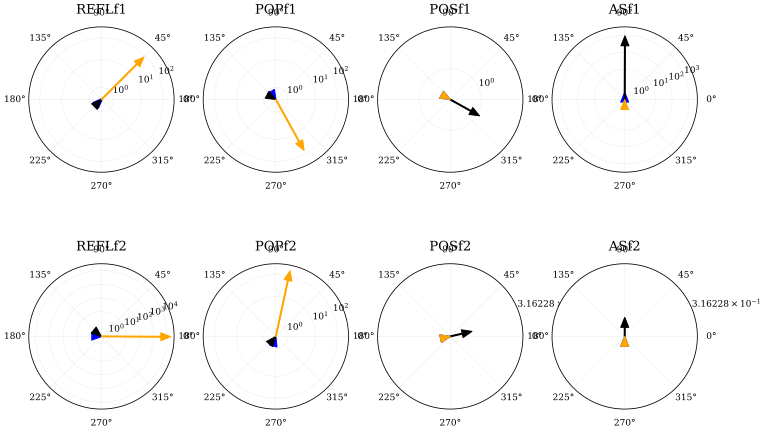

In [13]:



###### Computing the signal and plot ##########

# Specify subplot configuration
# This case is 2x4

ax = plt.subplots(2, 4, subplot_kw=dict(polar=True),figsize=[12, 8])[1].flatten()

color = ['blue','black','orange','yellowgreen']
# Specify signal ports
ports = ['REFL','POP','POS','AS']

# Specify DoF to plot
DoF = ['MICH','DARM','CARM']

t = np.zeros([len(DoF),2*len(ports)])

############## Plotting Radar ##################

for jj in range(len(DoF)):
    
    # Run the model
    model,out = utl.run_fsig(DoF[jj], base)

    # Plott color setting for each DoF
    prop = dict(shrink=0, width=1, headwidth=8, headlength=10, connectionstyle='arc3',
         facecolor = color[jj], edgecolor = color[jj])
    
    # Deriving the mag and phase, plotting on a radar
    for ii in range(len(ax)):
        if ii < len(ports):
            r, demod = utl.demod_phase(out, ports[ii], '1', 0)
            ax[ii].set_title(ports[ii]+'f'+'1')
        else:
            r, demod = utl.demod_phase(out, ports[ii-4], '2', 0)
            ax[ii].set_title(ports[ii-4]+'f'+'2')
        
        t[jj,ii] = r
        ax[ii].annotate('', xy=(np.pi/180*demod,r), xytext=[0,0], arrowprops=prop, label='test')
        ax[ii].set_rscale('symlog')
        
        # Setting the plot range
        if jj == 0:
            ax[ii].set_ylim(0,0.1)
        else:
            if t[jj,ii] > t[jj-1,ii]:
                rang = np.round(np.log10(t[jj,ii]))
                ax[ii].set_ylim([0,10**(rang+0.5)])
            else:
                rang = np.round(np.log10(t[jj-1,ii]))
                ax[ii].set_ylim([0,10**(rang+0.5)])
        
    


## Multiple plot practice

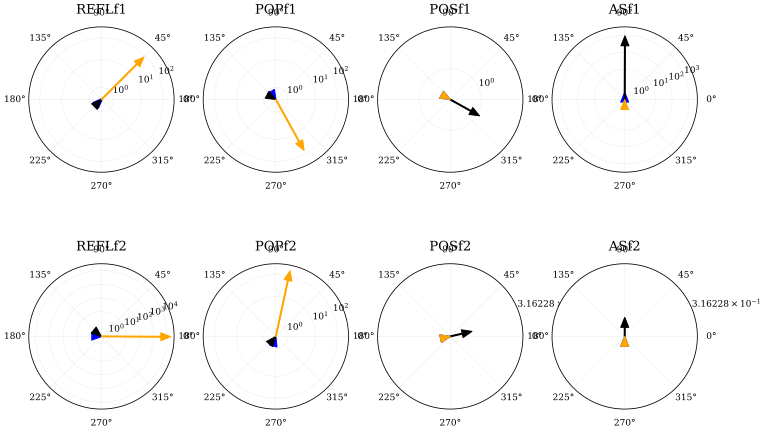

In [21]:
###### Computing the signal and plot ##########

# Specify subplot configuration
# This case is 2x4

ax = plt.subplots(2, 4, subplot_kw=dict(polar=True),figsize=[12, 8])[1].flatten()

color = ['blue','black','orange','yellowgreen']
# Specify signal ports
ports = ['REFL','POP','POS','AS']

# Specify DoF to plot
DoF = ['MICH','DARM','CARM']

t = np.zeros([len(DoF),2*len(ports)])

############## Plotting Radar ##################

for jj in range(len(DoF)):
    
    # Run the model
    model,out = utl.run_fsig(DoF[jj], base)

    # Plott color setting for each DoF
    prop = dict(shrink=0, width=1, headwidth=8, headlength=10, connectionstyle='arc3',
         facecolor = color[jj], edgecolor = color[jj])
    
    # Deriving the mag and phase, plotting on a radar
    for ii in range(len(ax)):
        if ii < len(ports):
            r, demod = utl.demod_phase(out, ports[ii], '1', 0)
            ax[ii].set_title(ports[ii]+'f'+'1')
        else:
            r, demod = utl.demod_phase(out, ports[ii-4], '2', 0)
            ax[ii].set_title(ports[ii-4]+'f'+'2')
        
        t[jj,ii] = r
        ax[ii].annotate('', xy=(np.pi/180*demod,r), xytext=[0,0], arrowprops=prop, label='test')
        ax[ii].set_rscale('symlog')
        
        # Setting the plot range
        if jj == 0:
            ax[ii].set_ylim(0,0.1)
        else:
            if t[jj,ii] > t[jj-1,ii]:
                rang = np.round(np.log10(t[jj,ii]))
                ax[ii].set_ylim([0,10**(rang+0.5)])
            else:
                rang = np.round(np.log10(t[jj-1,ii]))
                ax[ii].set_ylim([0,10**(rang+0.5)])
        
    


//miniconda3/envs/py37/lib/python3.7/site-packages/matplotlib/patches.py:3145: RuntimeWarning: divide by zero encountered in double_scalars
  ff = d / (dx * dx + dy * dy) ** .5
//miniconda3/envs/py37/lib/python3.7/site-packages/matplotlib/patches.py:3146: RuntimeWarning: invalid value encountered in double_scalars
  x2, y2 = x0 - ff * dx, y0 - ff * dy


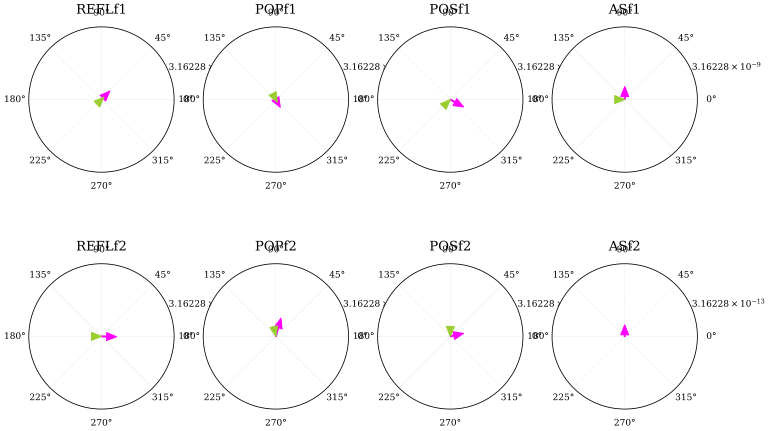

In [14]:
###### Computing the signal and plot ##########

# Specify subplot configuration
# This case is 2x4

ax = plt.subplots(2, 4, subplot_kw=dict(polar=True),figsize=[12, 8])[1].flatten()

color = ['magenta','yellowgreen']
# Specify signal ports
ports = ['REFL','POP','POS','AS']

# Specify DoF to plot
DoF = ['PRCL','SRCL']

t = np.zeros([len(DoF),2*len(ports)])

############## Plotting Radar ##################

for jj in range(len(DoF)):
    
    # Run the model
    model,out = utl.run_fsig(DoF[jj], base)

    # Plott color setting for each DoF
    prop = dict(shrink=0, width=1, headwidth=8, headlength=10, connectionstyle='arc3',
         facecolor = color[jj], edgecolor = color[jj])
    
    # Deriving the mag and phase, plotting on a radar
    for ii in range(len(ax)):
        if ii < len(ports):
            r, demod = utl.demod_phase(out, ports[ii], '1', 0)
            ax[ii].set_title(ports[ii]+'f'+'1')
        else:
            r, demod = utl.demod_phase(out, ports[ii-4], '2', 0)
            ax[ii].set_title(ports[ii-4]+'f'+'2')
        
        t[jj,ii] = r
        ax[ii].annotate('', xy=(np.pi/180*demod,r), xytext=[0,0], arrowprops=prop, label='test')
        ax[ii].set_rscale('symlog')
        
        # Setting the plot range
        if jj == 0:
            ax[ii].set_ylim(0,0.1)
        else:
            if t[jj,ii] > t[jj-1,ii]:
                rang = np.round(np.log10(t[jj,ii]))
                ax[ii].set_ylim([0,10**(rang+0.5)])
            else:
                rang = np.round(np.log10(t[jj-1,ii]))
                ax[ii].set_ylim([0,10**(rang+0.5)])
        
    


# Be careful of polar log plots...

In [3]:
def plot_logpolar(ax, theta, r_, bullseye=None, **kwargs):
    min10 = np.log10(np.min(r_))
    max10 = np.log10(np.max(r_))
    if bullseye is None:
        bullseye = min10 - np.log10(0.5 * np.min(r_))
    r = np.log10(r_) - min10 + bullseye
    ax.plot(theta, r, **kwargs)
    l = np.arange(np.floor(min10), max10)
    ax.set_rticks(l - min10 + bullseye) 
    ax.set_yticklabels(["1e%d" % x for x in l])
    ax.set_rlim(0, max10 - min10 + bullseye)
    ax.set_title('log-polar manual')
    return ax


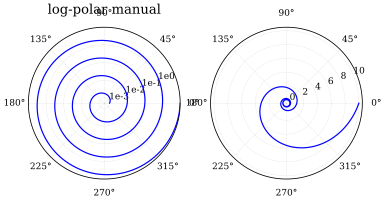

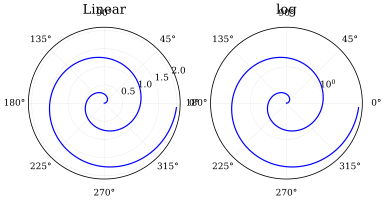

In [4]:
r = 10 ** np.arange(-3, 1.0, 0.0001) 
theta = 2 * np.pi * np.log10(r)

ax = plt.subplots(1, 2, subplot_kw=dict(polar=True))[1].flatten()

plot_logpolar(ax[0], theta, r)

ax[1]=plt.plot(theta,r)

plt.show()


r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r
ax = plt.subplots(1, 2, subplot_kw=dict(polar=True))[1].flatten()

ax[0].plot(theta, r)
ax[0].grid(True)
ax[0].set_title('Linear')
#plt.yscale('log')
#plt.yscale('symlog')

ax[1].plot(theta, r)
ax[1].set_title('log')
ax[1].set_yscale('symlog')

plt.show()




In [608]:
def plot_logpolar(ax, theta, r_, bullseye=None, **kwargs):
    min10 = np.log10(np.min(r_))
    print(min10)
    max10 = np.log10(np.max(r_))
    print(max10)
    if bullseye is None:
        bullseye = min10 - np.log10(0.5 * np.min(r_))
    r = np.log10(r_) - min10 + bullseye
    print(r)
    ax.plot(theta, r, **kwargs)
    l = np.arange(np.floor(min10), max10)
    ax.set_rticks(l - min10 + bullseye) 
    ax.set_yticklabels(["1e%d" % x for x in l])
    ax.set_rlim(0, max10 - min10 + bullseye)
    ax.set_title('log-polar manual')
    return ax

-3.0
-2.0
[0.30103 1.30103]


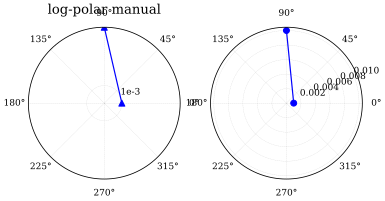

In [624]:
pi = np.pi
ymin=1e-3
rr = [ymin,1e-2]
tt = [0,np.pi/2]

ax = plt.subplots(1, 2, subplot_kw=dict(polar=True))[1].flatten()

plot_logpolar(ax[0], tt, rr, marker='^')

ax[1]=plt.plot(tt,rr, marker='o')
#ax[1].set_yscale('symlog')

plt.show()

In [616]:
def plot_logradar(ax, theta, r_, title, bullseye=None,):
    min10 = np.log10(r_)-1
    print(min10)
    max10 = np.log10(r_)
    print(max10)
    if bullseye is None:
        bullseye = min10 - np.log10(0.5 * np.min(r_))
        
    r = np.log10(r_) - min10 + bullseye
    phi = theta
    ax.plot(phi, r, 'ro')
    
    l = np.arange(np.floor(min10), max10)
    print(l - min10 + bullseye)
    ax.set_rticks(l - min10 + bullseye)
    
    ax.set_yticklabels(["1e%d" % x for x in l])
    ax.set_rlim(0, max10 - min10 + bullseye)
    ax.set_title(title)
    plt.show
    return ax

0.6989700043360187
1.6989700043360187
[-1.39794001 -0.39794001]


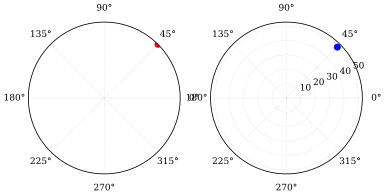

In [617]:
pi = np.pi
rr = 50
tt = pi/4
  
ax = plt.subplots(1, 2, subplot_kw=dict(polar=True))[1].flatten()

ax[0] = plot_logradar(ax[0], tt, rr, '', bullseye=None)

ax[1]=plt.plot(tt,rr, marker='o')
#ax[1].set_yscale('symlog')

plt.show()

In [586]:
phi = np.zeros(2)
phi[0]=2
phi[1]=9
print(phi)
print(r)

[2. 9.]
[-0.39793901  0.30103     3.          4.        ]


# when r > 1

radius 0.6989700043360189
ymin 0
ymax 1
k is 1
[0]
0
1
2


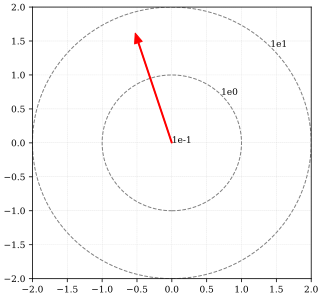

In [725]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, polar=False)
pi = np.pi


## Arrow 3 ##
r3 = 5
r3ln = np.log10(r3)
theta3 = 6*pi/10

# Setting Default range
ymax = int(np.ceil(r3ln))
ymin = int(np.floor(r3ln))
if ymin == ymax:
    ymin = ymax - 1


    
# Setting Manual Range
#ymax = 2
#ymin = -1

print('radius %s' % r3ln)
print('ymin %s' % ymin)
print('ymax %s' % ymax)

if np.abs(r3) < 1e-6:
    print('Skipping the plot due to the signal is small (<1e-6)...')
    
elif r3ln > 0:    
    x3 = (abs(r3ln)-ymin+1)*np.cos(theta3)
    y3 = (abs(r3ln)-ymin+1)*np.sin(theta3)
    ax.annotate('',xy=[x3,y3],xytext=[0,0] ,arrowprops=dict(shrink=0, width=1, headwidth=8, 
                                                      headlength=10, connectionstyle='arc3',
                                                      facecolor='red', edgecolor='red'))
## Adding Ticks
    k = ymax - ymin
    u = np.array(["%d" % x for x in range(int(k))],dtype='int8')
    l = np.arange(ymin, ymax)
    print("k is %d" % k)
    print(l)
    if ymax == 0:
        ax.set_ylim(-1,1)
        ax.set_xlim(-1,1)
    else:
        ax.set_ylim(-(k+1),k+1)
        ax.set_xlim(-(k+1),k+1)
    
    for x in range(0,3):
        s1 = '1e%s' % (x+ymin-1)
        ax.text(x/np.sqrt(2), x/np.sqrt(2), s1, fontsize=9, ha='left', rotation=0, wrap=True)
        c = patches.Circle(xy=(0, 0), radius=x, ec='gray', fill=False,linestyle='--')
        ax.add_patch(c)
        print(x)

    plt.show()
    
elif r3ln == 0:
        pass
    
elif r3ln < 0:
        pass
        


# When r < 1

radius 0.0
ymin -1
ymax 0
k is 1
[-1]
0
1
2


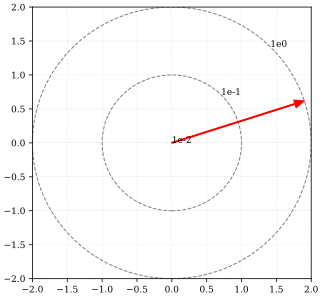

0.0


In [741]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, polar=False)
pi = np.pi


## Arrow 3 ##
r3 = 1
r3ln = np.log10(r3)
theta3 = pi/10

# Setting Default range
ymax = int(np.ceil(r3ln))
ymin = int(np.floor(r3ln))
if ymin == ymax:
    ymin = ymax - 1

# Setting Manual Range
#ymax = 2
#ymin = -1

print('radius %s' % r3ln)
print('ymin %s' % ymin)
print('ymax %s' % ymax)

if np.abs(r3) < 1e-6:
    print('Skipping the plot due to the signal is small (<1e-6)...')
    
else: 
    x3 = (abs(r3ln-ymin)+1)*np.cos(theta3)
    y3 = (abs(r3ln-ymin)+1)*np.sin(theta3)
    ax.annotate('',xy=[x3,y3],xytext=[0,0] ,arrowprops=dict(shrink=0, width=1, headwidth=8, 
                                                      headlength=10, connectionstyle='arc3',
                                                      facecolor='red', edgecolor='red'))
## Adding Ticks
    k = ymax - ymin
    u = np.array(["%d" % x for x in range(int(k))],dtype='int8')
    l = np.arange(ymin, ymax)
    ax.set_ylim(-(k+1),k+1)
    ax.set_xlim(-(k+1),k+1)
    ax.set
    for x in range(0,3):
        s1 = '1e%s' % (x+ymin-1)
        ax.text(x/np.sqrt(2), x/np.sqrt(2), s1, fontsize=9, ha='left', rotation=0, wrap=True)
        c = patches.Circle(xy=(0, 0), radius=x, ec='gray', fill=False,linestyle='--')
        ax.add_patch(c)
        print(x)

    plt.show()
    

print(abs(r3ln)-np.abs(ymin)+1)


In [17]:
def cust_polar(theta3, r3, ax, prop):

# Setting Default range
    r3ln = np.log10(r3)
    ymax = int(np.ceil(r3ln))
    ymin = int(np.floor(r3ln))
    if ymin == ymax:
        ymin = ymax - 1

# Setting Manual Range
    #ymax = 2
    #ymin = -1

# Plotting data
    if np.abs(r3) < 1e-6:
        print('Skipping the plot due to the signal is small (<1e-6)...')
    else:
        x3 = (abs(r3ln-ymin)+1)*np.cos(theta3)
        y3 = (abs(r3ln-ymin)+1)*np.sin(theta3)
        ax.annotate('',xy=[x3,y3],xytext=[0,0] ,arrowprops=prop)
## Adding Ticks
    k = ymax - ymin
    u = np.array(["%d" % x for x in range(int(k))],dtype='int8')
    l = np.arange(ymin, ymax)
    ax.set_ylim(-(k+1),k+1)
    ax.set_xlim(-(k+1),k+1)
    ax.set_xticklabels([]) 
    ax.set_yticklabels([])
        
    for x in range(0,3):
        s1 = '1e%s' % (x+ymin-1)
        ax.text(x/np.sqrt(2), x/np.sqrt(2), s1, fontsize=9, ha='left', rotation=0, wrap=True)
        c = patches.Circle(xy=(0, 0), radius=x, ec='gray', fill=False,linestyle='--')
        ax.add_patch(c)

    plt.show()
    
    return ax


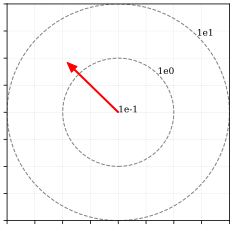

In [18]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
prop = dict(shrink=0, width=1, headwidth=8, headlength=10, connectionstyle='arc3',
            facecolor='red', edgecolor='red')
r = 2
theta = 3*np.pi/4

ax = cust_polar(theta, r, ax, prop)
    

NameError: name 'cust_polar' is not defined

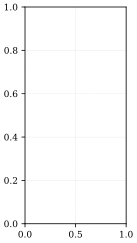

In [16]:
fig = plt.figure(figsize=(4,4))
#ax = fig.add_subplot(121)
ax1 = plt.subplot(1,2,1)
prop = dict(shrink=0, width=1, headwidth=8, headlength=10, connectionstyle='arc3',
            facecolor='red', edgecolor='red')
r = 2
theta = 3*np.pi/4


ax1 = cust_polar(theta, r, ax1, prop)

ax2 = plt.subplot(1,2,2)
ax2 = cust_polar(theta/5, r/2, ax2, prop)

###


